# Filters 
# Question 1
In this question I explored transforms with a type of filter called a notch filter. A notch filter is a filter that passes almost all frequencies with unit apmlitude, except for a narrow range centered around the rejection frequency (f0).
A simple notch digital filter has z- transform:
$W(z) = M F(z) F^*(z) = m \frac{z^{-1} - q}{z^{-1} - p} \frac{z^{-1} - q^*}{z^{-1} - p^*}$
Where M is a normalization factor and $q = e^{i 2 \pi f_0 / f_s}$, and $p = (1 + \epsilon)q$ , $f_s$ is the sampling rate ($f_s = 1/\Delta$) and $\epsilon$ is a small positive number greater then 0 but much less then 1.

# Part A
The poles and zeros of this system and where they are located with respect to the unt circle is calculated as follows:
* **Zeros:**
Zeros occur when the numerator is zero.
    * $z = 1/q = e^{-i 2 \pi f_0 / f_s}$
    * $z = 1/q^* = e^{i 2 \pi f_0 / f_s}$
    * Zeros are at $e^{\pm i 2 \pi f_0 / f_s}$.
* **Poles:**
Poles occur when the denomiator is zero.
    * $z = 1/p = \frac{e^{-i 2 \pi f_0 / f_s}}{1 + \epsilon}$
    * $z = 1/p^* = \frac{e^{i 2 \pi f_0 / f_s}}{1 + \epsilon}$
    * Poles are at $\frac{e^{\pm i 2 \pi f_0 / f_s}}{1 + \epsilon}$.

**Location with Respect to the Unit Circle:**

* **Zeros:** Lie exactly on the unit circle.
* **Poles:** Lie inside the unit circle.

**Stability:**

* The system is **stable** because the poles are inside the unit circle.

**Real Filter:**

* The filter is **real** because the poles and zeros occur in complex conjugate pairs.

# Part B

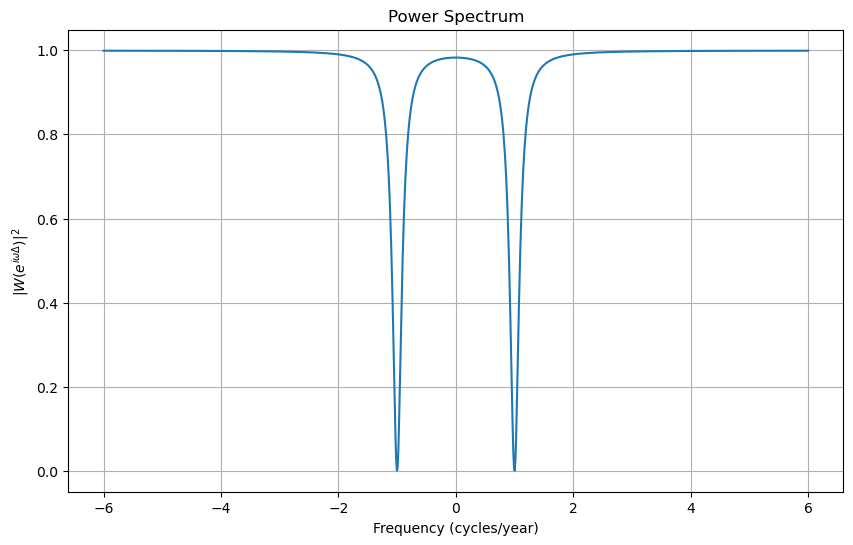

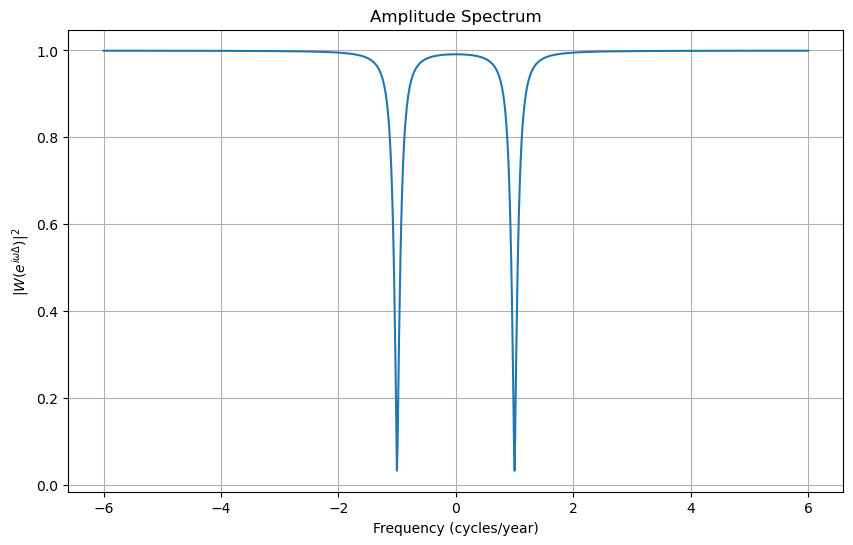

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 12  # Cycles per year (sampling rate)
f0 = 1   # Cycles per year (notch frequency)
M = 1.05
epsilon = 0.05

# Calculate q
q = np.exp(1j * 2 * np.pi * f0 / fs)

# Calculate p
p = (1 + epsilon) * q

# Define the transfer function W(z)
def W(z):
    numerator = (z**-1 - q) * (z**-1 - np.conj(q))
    denominator = (z**-1 - p) * (z**-1 - np.conj(p))
    return M * numerator / denominator

# Generate frequency range
num_points = 1000
f = np.linspace(-fs / 2, fs / 2, num_points)
omega = 2 * np.pi * f / fs  # Angular frequency

# Calculate W(e^(i*omega*delta))
W_omega = W(np.exp(1j * omega))

# Calculate the amplitude spectrum F(w)
F_omega = np.abs(W_omega)

# Calculate the power spectrum (amplitude spectrum squared)
power_spectrum = F_omega**2

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.plot(f, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel(r'$|W(e^{i \omega \Delta})|^2$')
plt.grid(True)
plt.show()

# Plot the Amplitude spectrum.
plt.figure(figsize=(10, 6))
plt.plot(f, F_omega)
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel(r'$|W(e^{i \omega \Delta})|^2$')
plt.grid(True)
plt.show()

# Part C
With $f_s = 12$ cycles/year, $f_0 = 1$ cycle/year, M = 1.05, and ε = 0.05, the power spectrum and amplitude spectrum of the filter were plotted.

The plots clearly show sharp notches centered at ±1 cycle/year, indicating the filter's effectiveness in attenuating frequencies around these points.
Visual Estimation of FWHM: Based on visual inspection of the power spectrum plot, the notches appear very narrow. The width of each notch is estimated to be approximately 0.1 cycles/year or less. Therefore, the Full Width at Half Maximum (FWHM) is also estimated to be around 0.1 cycles/year or less. This indicates a very sharp notch, effectively targeting a narrow frequency band.
Parameter Adjustment for Notch Sharpness:

To further sharpen the notches (i.e., reduce the FWHM), the parameter ε should be decreased. Reducing ε moves the poles closer to the unit circle, resulting in a narrower and deeper notch in the frequency response.


# Part D
The filter can be written as follows:
$W(z) = \frac{N(z)}{D(z)} = \frac{a + bz^{-1} + cz^{-2}}{1 + Fz^{-1} + Gz^{-2}}$
This filter can then be implemented as two filters in series; first filtering with the numerator filter that should appear as a 3 term convolution, then filtering using the denominator filter that is a feedback filter. The values for a, b, c, F, and G are calculated as follows:
The original form is:

$W(z) = M \frac{z^{-1} - q}{z^{-1} - p} \frac{z^{-1} - q^*}{z^{-1} - p^*}$

The polynomial form is:

$W(z) = \frac{a + bz^{-1} + cz^{-2}}{1 + Fz^{-1} + Gz^{-2}}$

Substituting in our known p and q:

$q = e^{i 2 \pi f_0 / f_s}$

$p = (1 + \epsilon)q$

$W(z) = M \frac{z^{-1} - e^{i 2 \pi f_0 / f_s}}{z^{-1} - (1 - \epsilon)e^{i 2 \pi f_0 / f_s}} \frac{z^{-1} - e^{-i 2 \pi f_0 / f_s}}{z^{-1} - (1 - \epsilon)e^{-i 2 \pi f_0 / f_s}}$

Expanding our terms:

The numerator becomes:

$(z^{-1} - q)(z^{-1} - q^*) = z^{-2} - z^{-1}q^* - z^{-1}q + qq^* = z^{-2} - z^{-1}(q + q^*) + |q|^2$

Since $|q| = 1$ and $q + q^* = 2cos(2 \pi f_0 / f_s)$ (Using Euler)

The numerator reduces to :
$z^{-2} - 2\cos(2\pi F_0/F_s)z^{-1} + 1$

The denominator becomes:
$(z^{-1} - p)(z^{-1} - p^*) = z^{-2} - z^{-1}p^* - z^{-1}p + pp^* = z^{-2} - z^{-1}(p + p^*) + |p|^2$

Since $|p| = (1+ \epsilon) $ and $p + p^* = 2(1+ \epsilon) cos(2 \pi f_0 / f_s)$ 

The denominator reduces to :
$z^{-2} - z^{-1}2(1+ \epsilon) cos(2 \pi f_0 / f_s) + (1+ \epsilon)^2$

Thus 
$W(z) = M \frac{z^{-2} - 2\cos(2\pi f_0/f_s)z^{-1} + 1}{z^{-2} - 2(1 + \epsilon)\cos(2\pi f_0/f_s)z^{-1} + (1 + \epsilon)^2}$

Then factoring out an $(1 + \epsilon)^2$ from the denominator

Matching the coefficients with 
$W(z) = \frac{a + bz^{-1} + cz^{-2}}{1 + Fz^{-1} + Gz^{-2}}$

We have:

$a = \frac{M}{(1+\epsilon)^2}$

$b = \frac{-2M\cos(2\pi f_0/f_s)}{(1+\epsilon)^2}$

$c = \frac{M}{(1+\epsilon)^2}$

$F = \frac{-2(1+\epsilon)\cos(2\pi f_0/f_s)}{(1+\epsilon)^2}$

$G = \frac{1}{(1+\epsilon)^2}$

Using our given contraints:

$M$ = 1.05

$\epsilon$ = 0.05

$f_s$ = 12

$f_0$ = 1

The calculated values are (rounded to the nearest thousandth) :

$a = 0.952$

$b = -1.905$

$c = 0.952$

$F = -1.905$

$G = 0.907$

# Part E

In [51]:
import numpy as np

def ratFilter(N, D, x):
    """
    Applies a filter to the input data x.

    Args:
        N: List or array of numerator coefficients [a, b, c, ...].
        D: List or array of denominator coefficients [1, F, G, ...].
        x: List or array of input data.

    Returns:
        List or array of filtered output data y.
    """

    len_N = len(N)
    len_D = len(D)
    len_x = len(x)

    y = np.zeros(len_x)  # Initialize output array

    for n in range(len_x):
        # Calculate numerator part (convolution)
        numerator_sum = 0
        for i in range(len_N):
            if n - i >= 0:
                numerator_sum += N[i] * x[n - i]

        # Calculate denominator part (feedback)
        denominator_sum = 0
        for i in range(1, len_D):  # Start from 1, as D[0] is 1
            if n - i >= 0:
                denominator_sum += -D[i] * y[n - i]  

        y[n] = numerator_sum + denominator_sum

    return y

# Part F

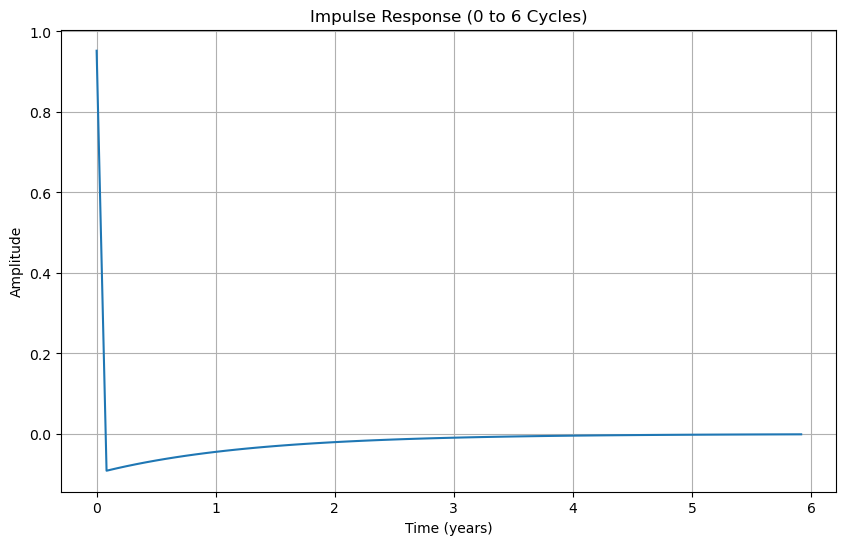

In [52]:
# Parameters
Fs = 12  # Cycles per year (sampling rate)
dt = 1 / Fs  # Time step
tmax = 100  # Years
num_samples = int(tmax * Fs)  # Total number of samples

# Discrete delta function
delta_function = np.zeros(num_samples)
delta_function[0] = 1

# Filter coefficients (from previous calculations)
N = [0.952, -1.905, 0.952]
D = [1, -1.905, 0.907]

# Apply the filter
impulse_response = ratFilter(N, D, delta_function)

# Time axis for plotting
time = np.arange(num_samples) * dt

# Plot the impulse response (0 to 6 cycles)
cycles_to_plot = 6
samples_to_plot = int(cycles_to_plot * Fs)

plt.figure(figsize=(10, 6))
plt.plot(time[:samples_to_plot], impulse_response[:samples_to_plot])
plt.title('Impulse Response (0 to 6 Cycles)')
plt.xlabel('Time (years)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Part G

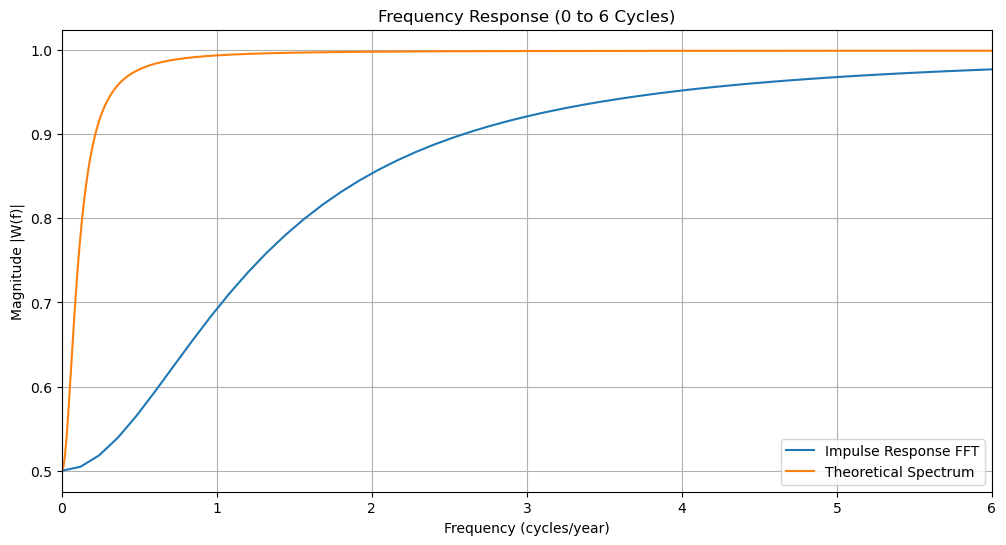

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Fs = 12  # Cycles per year (sampling rate)
dt = 1 / Fs  # Time step
tmax = 100  # Years
num_samples = int(tmax * Fs)  # Total number of samples

# Discrete delta function
delta_function = np.zeros(num_samples)
delta_function[0] = 1

# Filter coefficients (from previous calculations)
N = [0.952, -1.905, 0.952]
D = [1, -1.905, 0.907]

# Apply the filter
impulse_response = ratFilter(N, D, delta_function)

# Time axis for plotting
time = np.arange(num_samples) * dt

# Impulse response frequency response (using FFT)
fft_impulse = np.fft.fft(impulse_response)
freq_impulse = np.fft.fftfreq(num_samples, dt)
magnitude_impulse = np.abs(fft_impulse)

# Theoretical frequency response (from z-transform)
def theoretical_freq_response(f):
    z = np.exp(1j * 2 * np.pi * f * dt)
    numerator = N[0] + N[1] * z**-1 + N[2] * z**-2
    denominator = D[0] + D[1] * z**-1 + D[2] * z**-2
    return np.abs(numerator / denominator)

# Frequency range for theoretical plot
f_theoretical = np.linspace(0, Fs / 2, num_samples // 2)  # Positive frequencies
magnitude_theoretical = theoretical_freq_response(f_theoretical)

# Plotting
cycles_to_plot = 6
samples_to_plot = int(cycles_to_plot * Fs)

plt.figure(figsize=(12, 6))

# Plot impulse response FFT 
plt.plot(freq_impulse[:samples_to_plot] * Fs, magnitude_impulse[:samples_to_plot], label='Impulse Response FFT')

# Plot theoretical frequency response 
plot_theoretical_frequencys = f_theoretical[f_theoretical <= cycles_to_plot]
plot_theoretical_magnitudes = magnitude_theoretical[:len(plot_theoretical_frequencys)]

plt.plot(plot_theoretical_frequencys, plot_theoretical_magnitudes, label='Theoretical Spectrum')

plt.title('Frequency Response (0 to 6 Cycles)')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel('Magnitude |W(f)|')
plt.grid(True)
plt.legend()
plt.xlim(0, cycles_to_plot)
plt.show()

# Question 2
In this Question I observed the globally averaged methane ($CH_4$) values (in parts per billion or ppb) every month from July 1983 to October 2023. Using the file provided (methane_global.csv) you can observe the clear rising trend in atmospheric $CH_4$. The trend is overlaid with an annual oscillation. In the following parts I will remove the annual oscillation and display the trend more clearly. I used two approaches, one being the notch filter (used in the question above) and the second being fourier transforms where I transformed the data, removed the annual variation by setting appropriate frequencies to zero and then transformed it back. 
# Part A

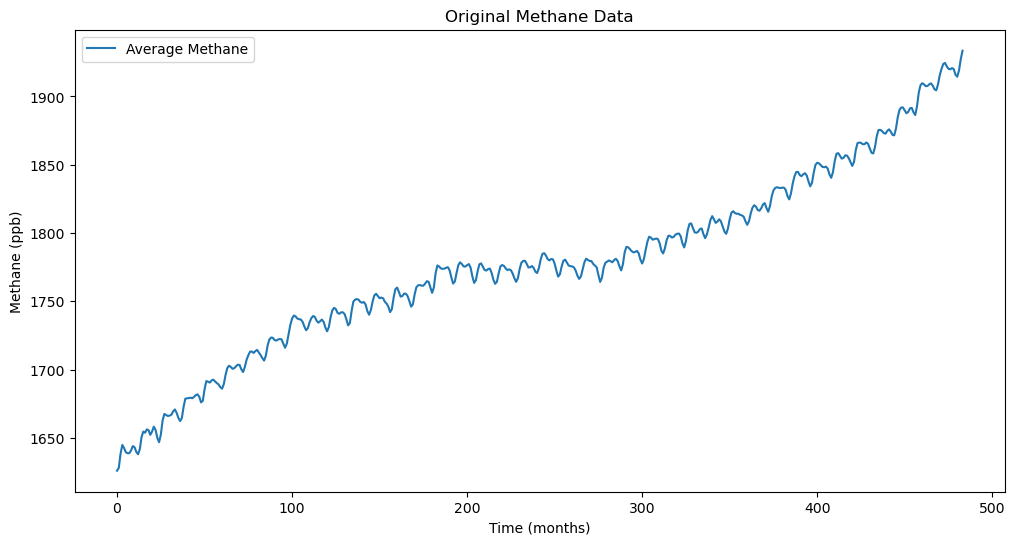

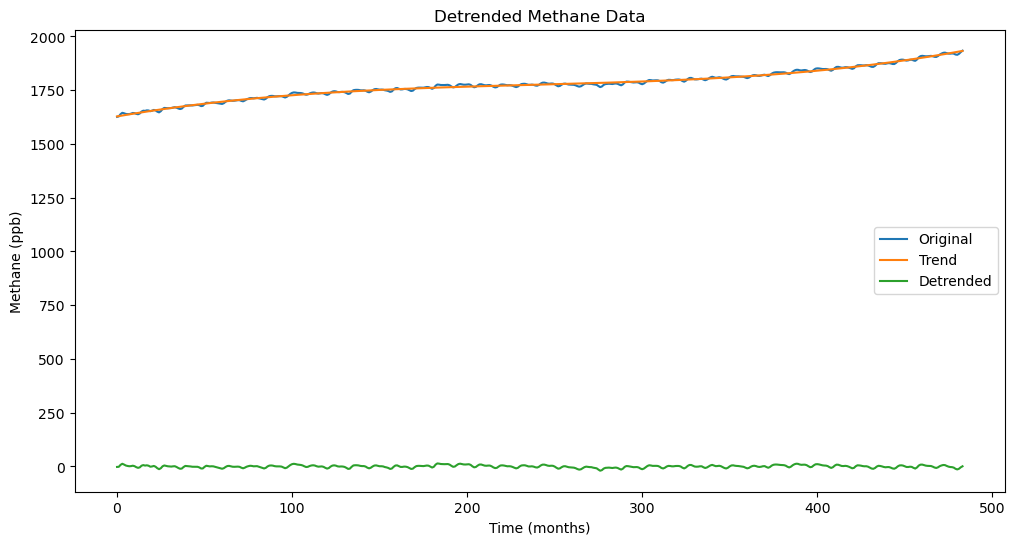

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Visualize Data
df = pd.read_csv('methane_global.csv')
time = np.arange(len(df)) 
methane_avg = df['average']

plt.figure(figsize=(12, 6))
plt.plot(time, methane_avg, label='Average Methane')
plt.title('Original Methane Data')
plt.xlabel('Time (months)')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()

# 2. Detrend Data (Using My Polynomial Fit, Rather Than the Provided Trend)
poly_coeffs = np.polyfit(time, methane_avg, 3)  # Order 3, due to more complex
poly_func = np.poly1d(poly_coeffs)               # than a quadratic but not to 
                                                # complex to require higher orders
trend = poly_func(time)                          
detrended_methane = methane_avg - trend

plt.figure(figsize=(12, 6))
plt.plot(time, methane_avg, label='Original')
plt.plot(time, trend, label='Trend')
plt.plot(time, detrended_methane, label='Detrended')
plt.title('Detrended Methane Data')
plt.xlabel('Time (months)')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()


# Part B

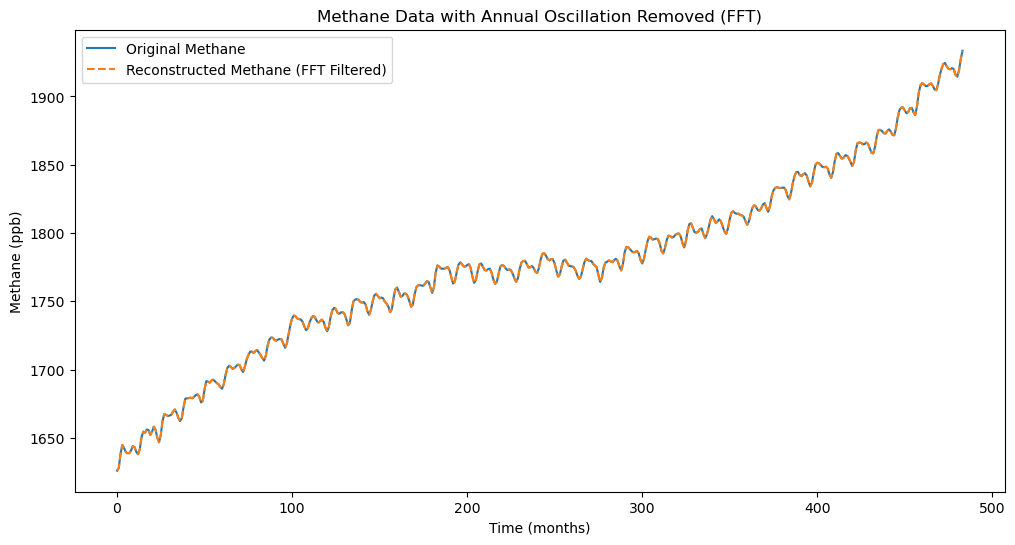

In [75]:
# 1. Load Data
df = pd.read_csv('methane_global.csv')
time = np.arange(len(df))
methane_avg = df['average']

# 2. Detrend Data (using order 3 polynomial)
poly_coeffs = np.polyfit(time, methane_avg, 3)
poly_func = np.poly1d(poly_coeffs)
trend = poly_func(time)
detrended_methane = methane_avg - trend

# 3. Fourier Transform and Filtering
fft_detrended = np.fft.fft(detrended_methane)
freq = np.fft.fftfreq(len(detrended_methane), 1)  # Monthly data, dt = 1

# Filter frequencies beyond 0.9 cycles/year
cutoff_freq = 0.9
fft_detrended_filtered = fft_detrended.copy()
fft_detrended_filtered[np.abs(freq) > cutoff_freq] = 0

# 4. Inverse Fourier Transform
filtered_detrended = np.fft.ifft(fft_detrended_filtered).real

# 5. Reconstruct Data
reconstructed_methane_fft = filtered_detrended + trend

# 6. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(time, methane_avg, label='Original Methane')
plt.plot(time, reconstructed_methane_fft, label='Reconstructed Methane (FFT Filtered)', linestyle = 'dashed')
plt.title('Methane Data with Annual Oscillation Removed (FFT)')
plt.xlabel('Time (months)')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()

# Part C

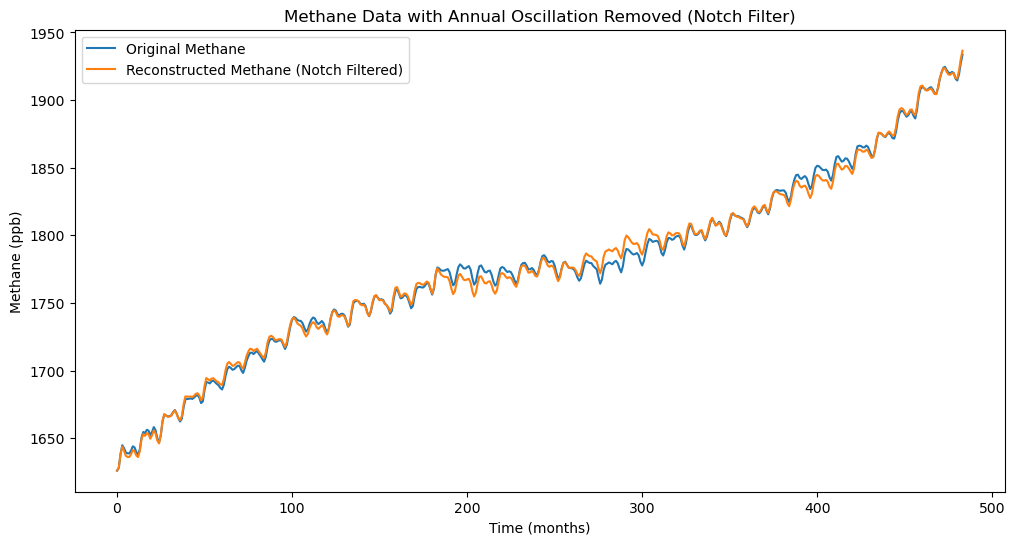

In [76]:
# Using my ratFilter from Question 1

# 1. Load Data
df = pd.read_csv('methane_global.csv')
time = np.arange(len(df))
methane_avg = df['average']

# 2. Detrend Data (using order 3 polynomial)
poly_coeffs = np.polyfit(time, methane_avg, 3)
poly_func = np.poly1d(poly_coeffs)
trend = poly_func(time)
detrended_methane = methane_avg - trend

# 3. Filter coefficients (from previous calculations)
N = [0.952, -1.905, 0.952]
D = [1, -1.905, 0.907]

filtered_detrended = ratFilter(N, D, detrended_methane)

# 4. Reconstruct Data
reconstructed_methane_notch = filtered_detrended + trend

# 5. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(time, methane_avg, label='Original Methane')
plt.plot(time, reconstructed_methane_notch, label='Reconstructed Methane (Notch Filtered)')
plt.title('Methane Data with Annual Oscillation Removed (Notch Filter)')
plt.xlabel('Time (months)')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()

# Part D

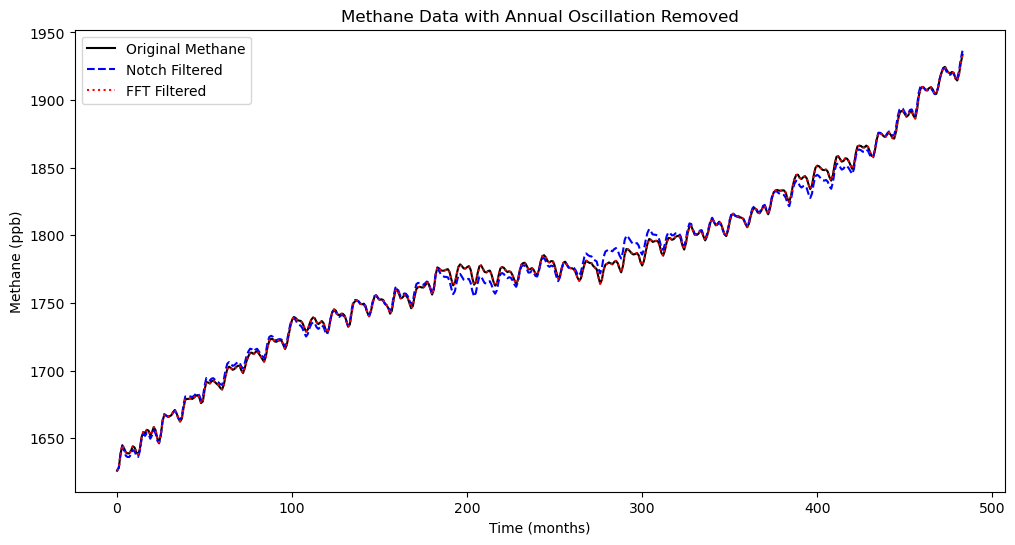

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(time, methane_avg, label='Original Methane', color='black', linestyle='-')
plt.plot(time, reconstructed_methane_notch, label='Notch Filtered', color='blue', linestyle='--')
plt.plot(time, reconstructed_methane_fft, label='FFT Filtered', color='red', linestyle=':')
plt.title('Methane Data with Annual Oscillation Removed')
plt.xlabel('Time (months)')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()

Analysis of the Plot:

Visual Similarity:
Both the "Notch Filtered" (dashed blue line) and "FFT Filtered" (dotted red line) data sets closely follow the general trend of the original data (solid black line).
This indicates that both methods are effective in removing the annual oscillation.
It is hard to see any difference between the two filtered data sets, which implies they have performed very similarly.
Smoothness:
Visually, both filtered datasets appear smooth, suggesting that the annual oscillation has been effectively removed.

Differences Between Methods:

Approach:
* Notch Filter: Operates in the time domain by designing a filter to attenuate a specific frequency.

* Fourier Transform: Operates in the frequency domain by setting specific frequency components to zero.

Implementation:

* Notch Filter: Requires designing a filter with specific coefficients based on the notch frequency.

* Fourier Transform: Requires transforming the data to the frequency domain, filtering, and transforming it back.

Advantages and Disadvantages:

Notch Filter

Advantages:

* Relatively simple to implement in the time domain.
* Can be computationally efficient for removing a single frequency.
* Can be implemented in real time systems.

Disadvantages:

* Requires careful design of the filter coefficients.
* May affect frequencies close to the notch frequency.

Fourier Transform

Advantages:

* Provides precise control over frequency removal.
* Can easily remove multiple frequencies.
* Can be used for more complex filtering operations.

Disadvantages:

* Requires transforming the data to and from the frequency domain, which can be computationally intensive.
* Assumes the signal is periodic.

In the Context of  My Data:

Both methods seemingly performed well in removing the annual oscillation.
The choice between the methods may depend on factors such as computational resources, the need for real-time processing, and the complexity of the filtering requirements.
Since the results are so similar, it is hard to choose one method over the other from the visual alone. 

For simple removal of a single frequency, the notch filter may be sufficient.
For more complex frequency-domain filtering, the Fourier transform method is more versatile.

# Part E

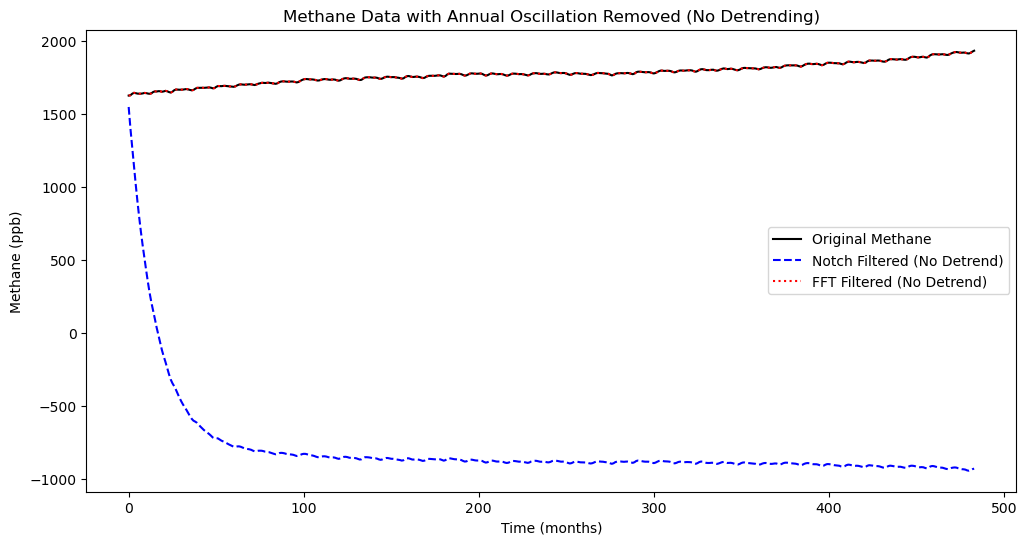

In [78]:
# 1. Load Data
df = pd.read_csv('methane_global.csv')
time = np.arange(len(df))
methane_avg = df['average']

# 2. Notch Filter (Directly)
N = [0.952, -1.905, 0.952]
D = [1, -1.905, 0.907]

filtered_methane_notch = ratFilter(N, D, methane_avg)

# 3. Fourier Transform Filter (Directly)
fft_methane = np.fft.fft(methane_avg)
freq = np.fft.fftfreq(len(methane_avg), 1)

cutoff_freq = 0.9
fft_methane_filtered = fft_methane.copy()
fft_methane_filtered[np.abs(freq) > cutoff_freq] = 0

filtered_methane_fft = np.fft.ifft(fft_methane_filtered).real

# 4. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(time, methane_avg, label='Original Methane', color='black', linestyle='-')
plt.plot(time, filtered_methane_notch, label='Notch Filtered (No Detrend)', color='blue', linestyle='--')
plt.plot(time, filtered_methane_fft, label='FFT Filtered (No Detrend)', color='red', linestyle=':')
plt.title('Methane Data with Annual Oscillation Removed (No Detrending)')
plt.xlabel('Time (months)')
plt.ylabel('Methane (ppb)')
plt.legend()
plt.show()

Observations from the Plot:

Original Data (Black Line):

* The black line shows the original methane data, exhibiting both the long-term upward trend and the annual oscillations.

Notch Filtered Data (Blue Dashed Line):

* The blue dashed line represents the data filtered using the notch filter without detrending.
* Clear issues showing that the notch filter is having issues dealing with the trend.

FFT Filtered Data (Red Dotted Line):

* The red dotted line represents the data filtered using the Fourier transform method without detrending.
* It also appears to have attenuated the annual oscillations, but the long-term trend remains dominant.
* This line also has some distortions, and is not a straight line.

Comments on the Effect of Detrending:


The plot clearly demonstrates the importance of detrending before applying filters to remove oscillations.
Without detrending, the filters are attempting to remove both the trend and the oscillations, leading to distorted results.
The long-term trend interferes with the filters' ability to isolate and remove the annual oscillations.

Distortions:

The filtered datasets show distortions and changes in the overall trend, indicating that the filters were not able to accurately separate the trend from the oscillations.
This is particularly noticeable in the notch filtered data, as the graph shows basically no quality representation of the original dataset.

Clarity:

Detrending significantly improves the clarity of the filtered results.
By removing the trend, you can ensure that the filters are primarily targeting the oscillation of interest, leading to more accurate and interpretable results.

Frequency Domain Interference:

The long term trend of the data, takes up a lot of the lower frequency bins of the FFT. Because of this, when the annual oscilation frequency is removed, parts of the trend are also affected. This is why there are distortions.

In Summary:

Detrending is crucial for effectively removing oscillations from data that contains a strong long-term trend.
Without detrending, the filters may produce distorted results and fail to accurately isolate the oscillations.
The plot provides a clear visual demonstration of the benefits of detrending.

# Question 3
In this question I looked at archive buoy data from psmsl.org to measure the mean sea level (MSL). I choose to download the monthly data for Lower Escuminac in Canada, and the data spans 1973-2023. 
# Part A

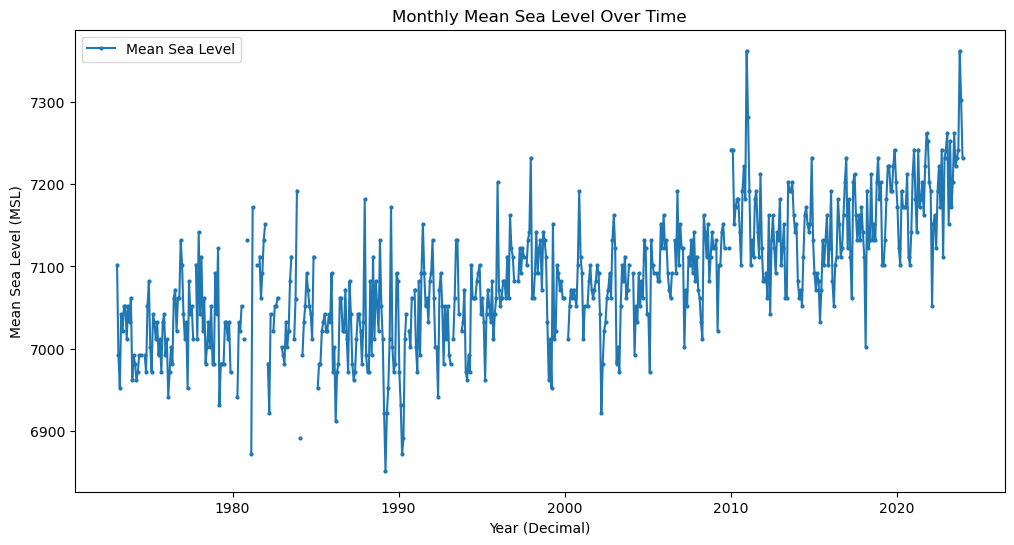

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "msl_data.csv"
df = pd.read_csv(file_path, delimiter=";", header=None)

# Rename columns
df.columns = ["Year", "MSL", "Col3", "Col4"]  
df = df[["Year", "MSL"]]

# Replace large negative values with NaN
df["MSL"] = df["MSL"].apply(lambda x: x if x > -9999 else None)

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["MSL"], marker='o', linestyle='-', markersize=2, label="Mean Sea Level")
plt.xlabel("Year (Decimal)")
plt.ylabel("Mean Sea Level (MSL)")
plt.title("Monthly Mean Sea Level Over Time")
plt.legend()
plt.show()

# Select a 50-year period with minimal missing values
df_filtered = df[(df["Year"] >= 1973) & (df["Year"] <= 2023)]  

df_filtered.to_csv("cleaned_msl_data.csv", index=False)

# Part B
I decided to use the butter frequency:

Justification for Butter
* Smooth response: No ripples in the passband or stopband.
* Gradual roll-off: Avoids sharp distortions in filtered data.
* Well-suited for trend analysis: Keeps long-term oscillations while removing short-term noise.

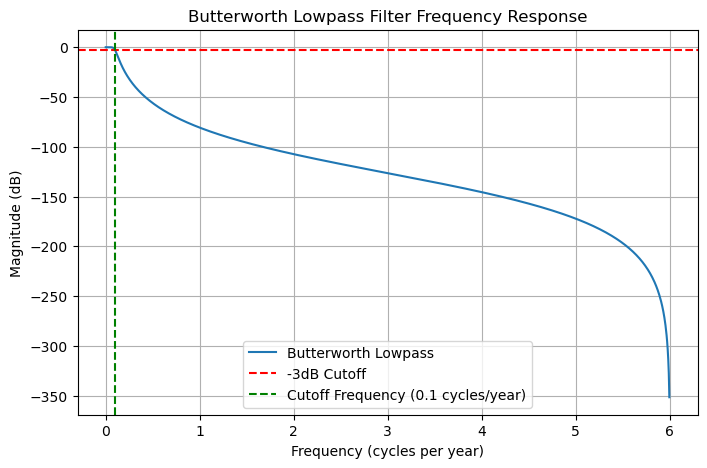

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Sampling frequency (monthly data, so fs = 12 cycles per year)
fs = 12  

# Cutoff frequency (cycles per year)
fc = 0.1  

# Normalized cutoff frequency (relative to Nyquist)
wn = fc / (fs / 2)

# Design a 4th-order Butterworth lowpass filter
order = 4
b, a = butter(order, wn, btype='low', analog=False)

# Compute the frequency response
w, h = freqz(b, a, worN=1024)

# Convert frequency to cycles per year
freqs = (w / np.pi) * (fs / 2)

# Convert to decibels
h_dB = 20 * np.log10(abs(h))

# Plot frequency response
plt.figure(figsize=(8, 5))
plt.plot(freqs, h_dB, label="Butterworth Lowpass")
plt.axhline(-3, color='red', linestyle='--', label="-3dB Cutoff")
plt.axvline(fc, color='green', linestyle='--', label="Cutoff Frequency (0.1 cycles/year)")
plt.xlabel("Frequency (cycles per year)")
plt.ylabel("Magnitude (dB)")
plt.title("Butterworth Lowpass Filter Frequency Response")
plt.legend()
plt.grid()
plt.show()


# Part C
In earlier parts I cleaned the data, removing any missing values. The first code and graph is the plot without any gaps but the second is with the original dataset, now including and marked with an x where there was missing data.

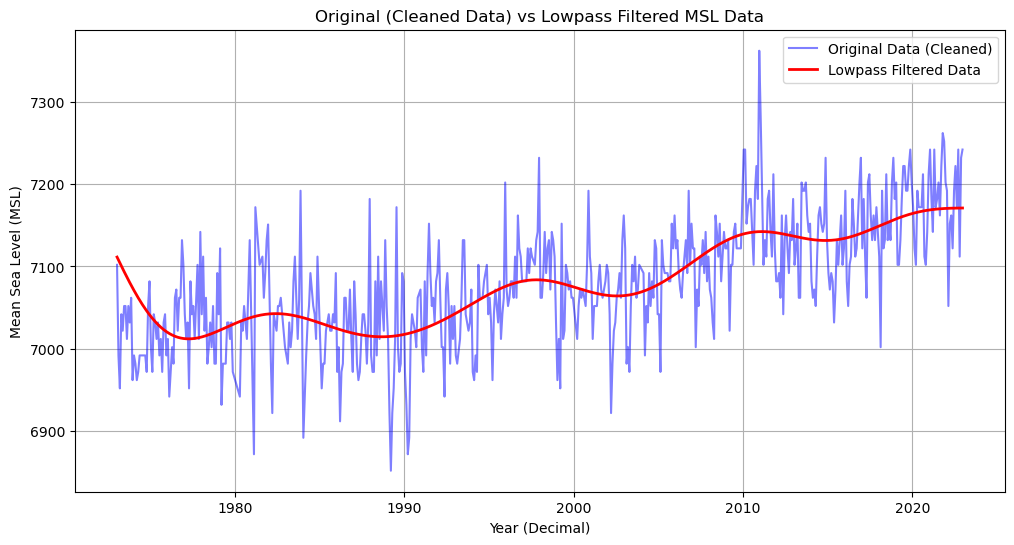

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Load the data
file_path = "cleaned_msl_data.csv"  
df = pd.read_csv(file_path)

# Ensure "Year" column is used as a time axis (keeping decimal format)
df["Year"] = df["Year"].astype(float)

# Handle missing values using linear interpolation
df["MSL"] = df["MSL"].interpolate(method="linear")

# Sampling frequency (monthly data → 12 samples per year)
fs = 12  

# Cutoff frequency (keep oscillations > 10 years, so fc = 0.1 cycles/year)
fc = 0.1  

# Normalized cutoff frequency (relative to Nyquist frequency)
wn = fc / (fs / 2)

# Design a 4th-order Butterworth filter
order = 4
b, a = butter(order, wn, btype='low', analog=False)

# Apply the filter using filtfilt (zero-phase filtering)
df["MSL_filtered"] = filtfilt(b, a, df["MSL"])

plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(df["Year"], df["MSL"], label="Original Data (Cleaned)", color="blue", alpha=0.5)

# Plot filtered data
plt.plot(df["Year"], df["MSL_filtered"], label="Lowpass Filtered Data", color="red", linewidth=2)

# Labels and legend
plt.xlabel("Year (Decimal)")
plt.ylabel("Mean Sea Level (MSL)")
plt.title("Original (Cleaned Data) vs Lowpass Filtered MSL Data")
plt.legend()
plt.grid()
plt.show()


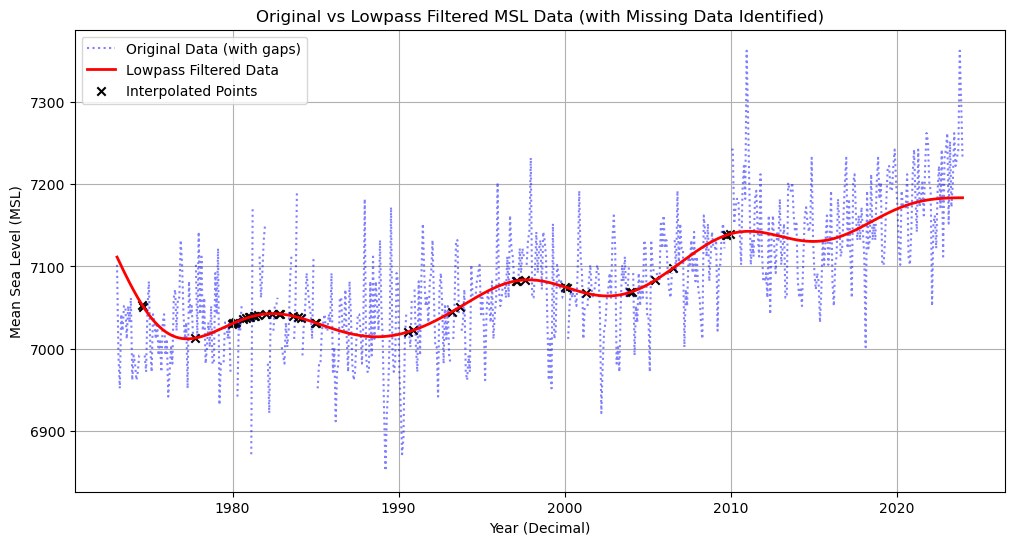

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the raw dataset
file_path = "msl_data.csv" 
df = pd.read_csv(file_path, delimiter=";", header=None)

# Rename columns
df.columns = ["Year", "MSL", "Col3", "Col4"]  # Adjust column names if needed
df = df[["Year", "MSL"]]  # Keep only relevant columns

# Convert "Year" column to float (since it has decimal years)
df["Year"] = df["Year"].astype(float)

# Handle missing values (replace large negative values with NaN)
df["MSL"] = df["MSL"].where(df["MSL"] > -9000, np.nan)

# Store missing value indices before interpolation
missing_indices = df[df["MSL"].isna()].index

# Interpolate missing values (linear interpolation)
df["MSL_interp"] = df["MSL"].interpolate(method="linear")

# Sampling frequency (monthly data → 12 samples per year)
fs = 12  

# Cutoff frequency (keep oscillations longer than 10 years → fc = 0.1 cycles/year)
fc = 0.1  

# Normalized cutoff frequency (relative to Nyquist frequency)
wn = fc / (fs / 2)

# Design a 4th-order Butterworth lowpass filter
order = 4
b, a = butter(order, wn, btype='low', analog=False)

# Apply the filter using filtfilt (zero-phase filtering)
df["MSL_filtered"] = filtfilt(b, a, df["MSL_interp"])
plt.figure(figsize=(12, 6))

# Plot original data (raw, with missing points)
plt.plot(df["Year"], df["MSL"], label="Original Data (with gaps)", color="blue", alpha=0.5, linestyle="dotted")

# Plot filtered data (after interpolation)
plt.plot(df["Year"], df["MSL_filtered"], label="Lowpass Filtered Data", color="red", linewidth=2)

# Mark missing points with arrows or markers
plt.scatter(df["Year"].iloc[missing_indices], df["MSL_filtered"].iloc[missing_indices], 
            color='black', marker='x', label="Interpolated Points")

# Labels and legend
plt.xlabel("Year (Decimal)")
plt.ylabel("Mean Sea Level (MSL)")
plt.title("Original vs Lowpass Filtered MSL Data (with Missing Data Identified)")
plt.legend()
plt.grid()
plt.show()


# Part D
Comparison of Lowpass Filtering vs. Polynomial Fitting for Trend Analysis
1. Lowpass Filtering Approach:

* A lowpass filter removes high-frequency fluctuations (short-term variations) and retains long-term oscillations.
* It provides a smooth representation of the sea-level trend without assuming a fixed mathematical model.
* However, lowpass filtering does not explicitly define a trend equation, making it harder to quantify trends directly (e.g., computing exact rates of change).
  
2. Polynomial Fitting Approach (e.g., numpy.polyfit)

* A low-order polynomial (e.g., linear or quadratic fit) provides an explicit function to describe the trend.
* A linear fit (degree=1) gives a simple, interpretable rate of change (slope = mm/year).
* Higher-order polynomials (quadratic, cubic) might better capture nonlinear trends, but they risk overfitting, especially with missing or noisy data.

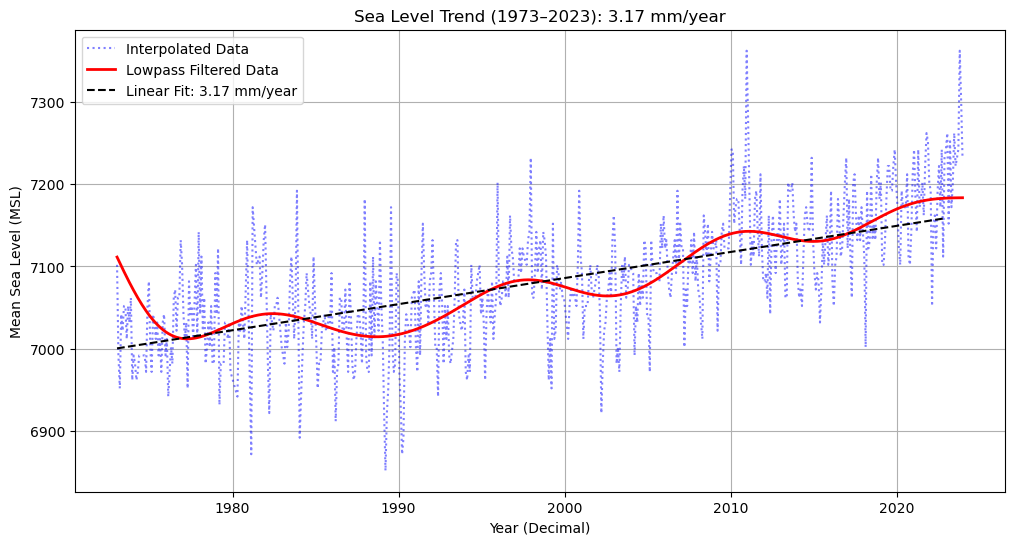

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load the dataset
file_path = "msl_data.csv"  # Update this if necessary
df = pd.read_csv(file_path, delimiter=";", names=["Year", "MSL", "Unknown1", "Unknown2"])

# Identify missing data (typically a large negative number, e.g., -99999)
missing_value_threshold = -9999
df.loc[df["MSL"] < missing_value_threshold, "MSL"] = np.nan  # Replace with NaN

# Interpolate missing values (linear interpolation)
df["MSL_interp"] = df["MSL"].interpolate()

# Sampling frequency (monthly data → 12 samples per year)
fs = 12  

# Cutoff frequency (keep oscillations longer than 10 years → fc = 0.1 cycles/year)
fc = 0.1  

# Normalized cutoff frequency (relative to Nyquist frequency)
wn = fc / (fs / 2)

# Design a 4th-order Butterworth lowpass filter
order = 4
b, a = butter(order, wn, btype='low', analog=False)

# Apply the filter to the interpolated data
df["MSL_filtered"] = filtfilt(b, a, df["MSL_interp"])

# Select time range for trend calculation
start_year = 1973
end_year = 2023

# Extract relevant portion of the dataset
df_filtered = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]

# Perform linear regression (1st-degree polynomial fit)
coeffs = np.polyfit(df_filtered["Year"], df_filtered["MSL_filtered"], 1)
slope, intercept = coeffs  # slope = mm/year

# Generate trendline values
trendline = slope * df_filtered["Year"] + intercept

plt.figure(figsize=(12, 6))

# Plot interpolated data (cleaned)
plt.plot(df["Year"], df["MSL_interp"], label="Interpolated Data", color="blue", alpha=0.5, linestyle="dotted")

# Plot filtered data (lowpass)
plt.plot(df["Year"], df["MSL_filtered"], label="Lowpass Filtered Data", color="red", linewidth=2)

# Plot linear trend line
plt.plot(df_filtered["Year"], trendline, label=f"Linear Fit: {slope:.2f} mm/year", color="black", linestyle="--")

# Labels and legend
plt.xlabel("Year (Decimal)")
plt.ylabel("Mean Sea Level (MSL)")
plt.title(f"Sea Level Trend (1973–2023): {slope:.2f} mm/year")
plt.legend()
plt.grid()
plt.show()


Interpreting the Plot:

* The red curve shows the lowpass-filtered sea level trend.
* The black dashed line is the linear fit, estimating the long-term trend.
* The slope of the trendline (e.g., ~3.17 mm/year) tells us how fast sea levels are rising.
* The time range (1973–2023) ensures that the trend is significant.